In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py

import tensorflow as tf
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# from skymapper import Map, projection

from time import time
from icecream import ic

from msfm.grid_pipeline import GridPipeline
from msfm.utils import logger, input_output, files

23-12-20 16:31:31   imports.py INF   Setting up healpy to run on 8 CPUs 
23-12-20 16:31:32   imports.py INF   Setting up healpy to run on 8 CPUs 


# v4 of the pipeline (multiple poisson noise realizations)

In [3]:
# tfr_pattern = "/pscratch/sd/a/athomsen/DESY3/v4/large_scales/tfrecords/grid/DESy3_grid_249.tfrecord"
# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v4/large_scales/tfrecords/grid/DESy3_grid_000.tfrecord"
# params = ["Om", "s8", "Aia", "bg", "n_Aia", "n_bg"]

# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/debug/tfrecords/grid/DESy3linear_grid_000.tfrecord"
# params = ["Om", "s8", "Aia", "n_Aia", "bg", "n_bg"]

# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/debug/tfrecords/grid/DESy3quadratic_grid_000.tfrecord"
# params = ["Om", "s8", "Aia", "n_Aia", "bg", "n_bg", "bg2", "n_bg2"]

# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/linear_bias/tfrecords/grid/DESy3_grid_000.tfrecord"
# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/linear_bias/debug/DESy3_grid_000.tfrecord"
# conf = "/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/configs/v5/linear_bias.yaml"
# params = ["Om", "s8", "Aia", "n_Aia", "bg", "n_bg"]
# filename_suffix = "_linear"

# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/quadratic_bias/debug/DESy3_grid_000.tfrecord"
# conf = "/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/configs/v5/quadratic_bias.yaml"
# params = ["Om", "s8", "Aia", "n_Aia", "bg", "n_bg", "bg2", "n_bg2"]
# filename_suffix = "_quadratic"

# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/stochasticity/tfrecords/grid/DESy3_grid_000.tfrecord"
# conf = "/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/configs/v5/stochasticity.yaml"
# params = ["Om", "s8", "Aia", "n_Aia", "bg", "n_bg"]
# filename_suffix = "_stochasticity"

# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v5/debug/DESy3grf_grid_000.tfrecord"
# conf = "/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/configs/v5/linear_bias.yaml"
# params = ["Om", "s8", "Ob", "H0", "ns", "w0", "Aia", "n_Aia", "bg", "n_bg"]
# filename_suffix = "grf"

tfr_pattern = "/cluster/work/refregier/athomsen/CosmoGrid/DESY3/v6/linear_bias/tfrecords/grid/DESy3_grid_050.tfrecord"
# tfr_pattern = "/cluster/work/refregier/athomsen/CosmoGrid/DESY3/v6/debug/DESy3_grid_000.tfrecord"
conf = "/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/configs/v6/linear_bias.yaml"
params = ["Om", "s8", "Ob", "H0", "ns", "w0", "Aia", "n_Aia", "bg", "n_bg"]
filename_suffix = ""


In [4]:
grid_pipe = GridPipeline(
    conf=conf,
    params=params,
    with_lensing=True,
    with_clustering=True,
    with_padding=True,
    apply_norm=False
)

23-12-20 16:31:32     files.py INF   Loaded the pixel file /cluster/home/athomsen/dlss/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-12-20 16:31:32     files.py INF   Loaded the pixel file /cluster/home/athomsen/dlss/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 


2023-12-20 16:31:33.371162: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
data_vec_pix = grid_pipe.data_vec_pix
n_side = 512
n_pix = hp.nside2npix(n_side)
n_z = grid_pipe.n_z_metacal + grid_pipe.n_z_maglim
n_z_metacal = grid_pipe.n_z_metacal
n_noise = 3

### compare noise realizations to noiseless

In [6]:
noisy_grid_dset = grid_pipe.get_dset(
        tfr_pattern=tfr_pattern,
        n_noise=n_noise,
        local_batch_size=1,
        n_readers=1,
        n_prefetch=0,
)

dvs_noisy = []
for dv, cosmo, index in noisy_grid_dset.take(n_noise):
    print(cosmo)
    dvs_noisy.append(dv)
    
dvs_noisy = np.concatenate(dvs_noisy, axis=0)
print(dvs_noisy.shape)

23-12-20 16:31:33 grid_pipelin INF   Interleaving with n_readers = 1 
23-12-20 16:31:34 grid_pipelin INF   Batching into 1 elements locally 
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '_fields'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '_fields'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '_fields'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23-12-20 16:31:35 grid_pipelin WAR   Tracing _augmentations 
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23-12-20 16:31:37 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'i_sobol', 'i_example', 'kg', 'dg', 'i_noise']) 
23-12-20 16:31:37 grid_pipelin INF   Successfully generated the grid validation set with element_spec (TensorSpec(shape=(None, 464896, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))) for i_noise in [0, 3) 
tf.Tensor(
[[ 2.5312501e-01  1.1890625e+00  3.4453124e-02  6.8640625e+0

In [7]:
# in degrees
x_deg = 10
y_deg = x_deg

# in pixels
x_pix = 600
y_pix = x_pix

# in arcminute / pixel
reso = x_deg / x_pix * 60

gnoms = np.zeros((len(dvs_noisy), x_pix, y_pix, n_z))

for i_n in range(len(dvs_noisy)):
    for i_z in range(n_z):
        hp_map = np.full(n_pix, hp.UNSEEN)
        hp_map[data_vec_pix] = dvs_noisy[i_n,:,i_z]

        gnom = hp.gnomview(hp_map, nest=True, rot=(90, -30, 0), reso=reso, xsize=x_pix, ysize=y_pix, return_projected_map=True, no_plot=True)
        gnoms[i_n, ..., i_z] = gnom

gnoms = np.ma.masked_where(gnoms==0, gnoms)

In [8]:
# reso = 600

# gnoms = np.zeros((len(dvs_noisy), reso, reso, n_z))

# for i_n in range(len(dvs_noisy)):
#     for i_z in range(n_z):
#         hp_map = np.full(n_pix, hp.UNSEEN)
#         hp_map[data_vec_pix] = dvs_noisy[i_n,:,i_z]

#         gnom = hp.gnomview(hp_map, nest=True, rot=(90, -30, 0), reso=1, xsize=reso, ysize=reso, return_projected_map=True, no_plot=True)
#         gnoms[i_n, ..., i_z] = gnom

# gnoms = np.ma.masked_where(gnoms==0, gnoms)

### raw maps

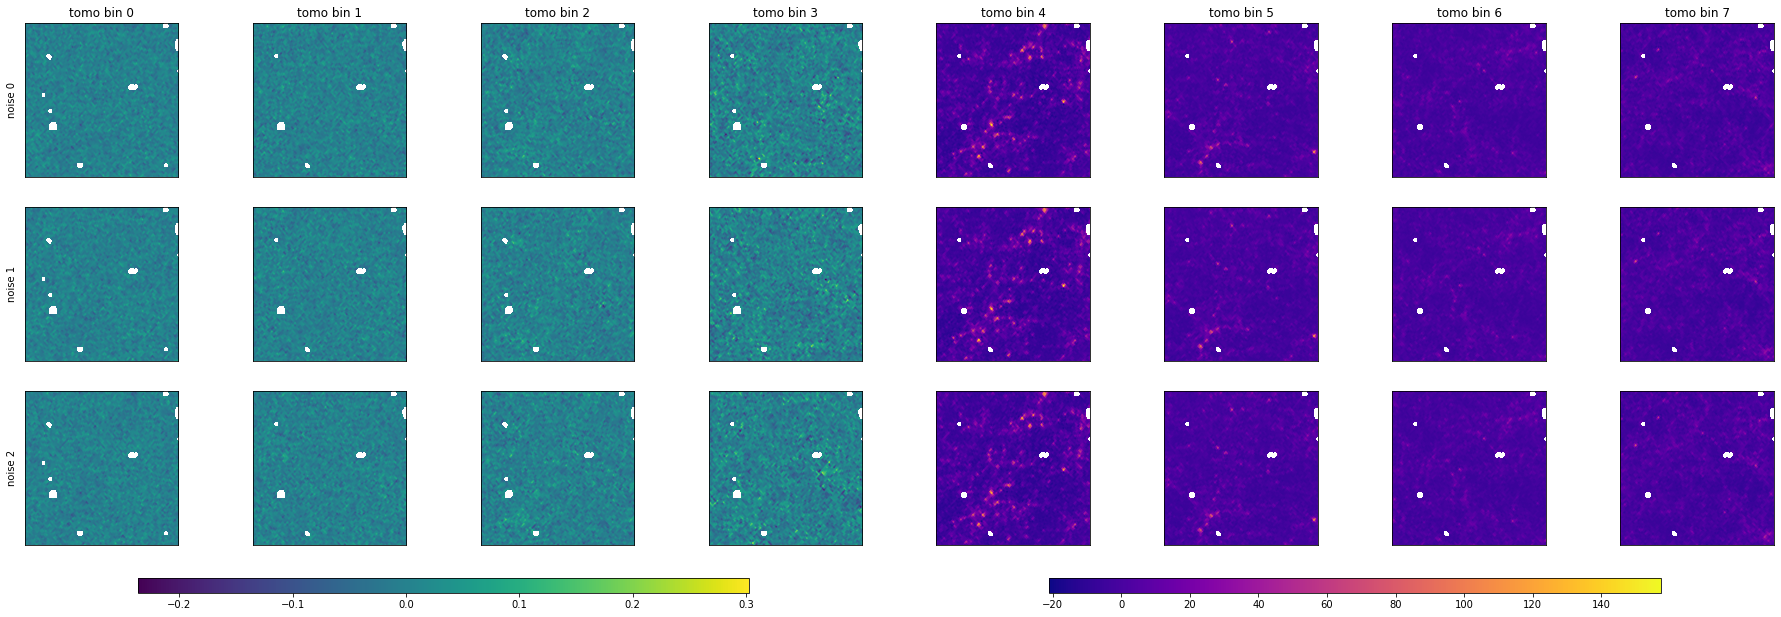

In [9]:
fig, ax = plt.subplots(figsize=(4*n_z, 4*n_noise), nrows=n_noise, ncols=n_z)

wl_min = np.array(gnoms[...,:n_z_metacal]).min()
wl_max = np.array(gnoms[...,:n_z_metacal]).max()

gc_min = np.array(gnoms[...,n_z_metacal:]).min()
gc_max = np.array(gnoms[...,n_z_metacal:]).max()

for i_n  in range(n_noise):
    for i_z in range(n_z):
        # lensing
        if i_z < n_z_metacal:
            vmin = wl_min
            vmax = wl_max
            cmap = "viridis"

        # clustering
        else:
            vmin = gc_min
            vmax = gc_max
            
            # vmin = -4
            # vmax = 5

            cmap = "plasma"

        gnom = gnoms[i_n, ..., i_z]

        im = ax[i_n, i_z].imshow(gnom, vmin=vmin, vmax=vmax, cmap=cmap)

        ax[i_n, i_z].set_xticks([])
        ax[i_n, i_z].set_yticks([])
        ax[i_n, i_z].set_aspect("equal")
        
        if i_z == 0:
            ax[i_n, i_z].set(ylabel=f"noise {i_n}")
            
        if i_n == 0:
            ax[i_n, i_z].set(title=f"tomo bin {i_z}")
            
        if i_n == n_noise - 1:
            if i_z == 0:
                fig.colorbar(im, ax=ax[:,:n_z_metacal], orientation="horizontal", shrink=0.7, aspect=40, pad=0.05)
            if i_z == 4:
                fig.colorbar(im, ax=ax[:,n_z_metacal:], orientation="horizontal", shrink=0.7, aspect=40, pad=0.05)
                
fig.savefig("plots/gnom_maps" + filename_suffix + ".png", bbox_inches="tight", dpi=100)

-1.38253355e-08 1.0 4.389455964066489 51.31722490376755
9.062214e-09 1.0 3.072375940255636 23.693724943703046
4.476515e-09 0.99999994 2.4139537359393235 14.102096820377302
-2.582185e-08 1.0000001 2.0136555360018344 10.38390823561385


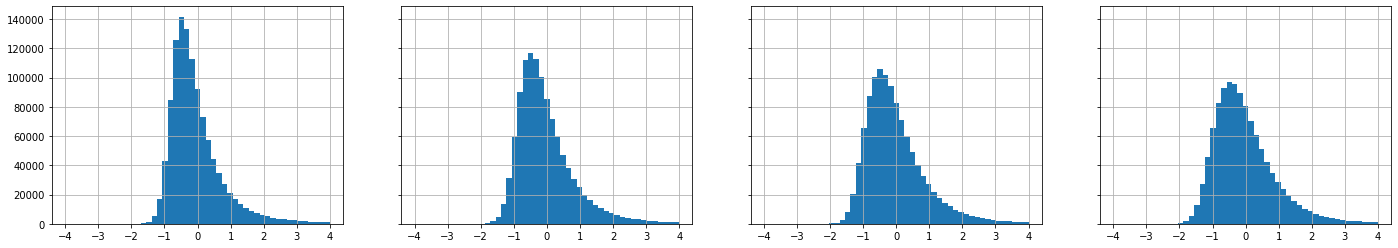

In [10]:
n_clustering_tomo = 4

fig, ax = plt.subplots(figsize=(6*n_clustering_tomo, 4), ncols=n_clustering_tomo, sharex=True, sharey=True)

for i in range(n_clustering_tomo):
    dv_noisy = dvs_noisy[...,i+4]
    dv_noisy = dv_noisy.ravel()
    dv_noisy = dv_noisy[dv_noisy!=0]
    dv_noisy = (dv_noisy - np.mean(dv_noisy))/np.std(dv_noisy)
    
    print(np.mean(dv_noisy), np.std(dv_noisy), skew(dv_noisy), kurtosis(dv_noisy))
    
    ax[i].hist(dv_noisy[dv_noisy!=0], np.linspace(-4, 4, 50))
    
    ax[i].grid(True)
    
fig.savefig("plots/clustering_hist" + filename_suffix + ".png", bbox_inches="tight", dpi=100)

### differences to noise 0

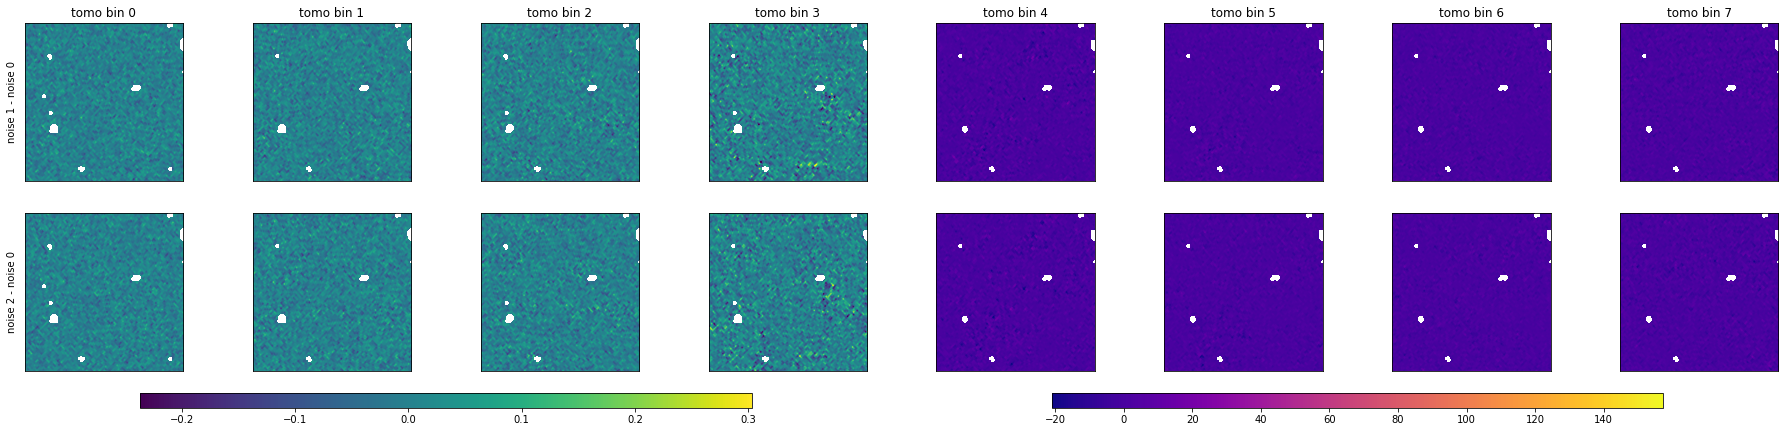

In [11]:
fig, ax = plt.subplots(figsize=(4*n_z, 4*(n_noise - 1)), nrows=n_noise - 1, ncols=n_z)

for i_n in range(n_noise - 1):
    for i_z in range(n_z):
        # lensing
        if i_z < n_z_metacal:
            vmin = wl_min
            vmax = wl_max
            cmap = "viridis"

        # clustering
        else:
            vmin = gc_min
            vmax = gc_max
            cmap = "plasma"

        gnom = gnoms[i_n+1, ..., i_z] - gnoms[0, ..., i_z]
        im = ax[i_n, i_z].imshow(gnom, vmin=vmin, vmax=vmax, cmap=cmap)

        ax[i_n, i_z].set_xticks([])
        ax[i_n, i_z].set_yticks([])
        ax[i_n, i_z].set_aspect("equal")
        
        if i_z == 0:
            ax[i_n, i_z].set(ylabel=f"noise {i_n+1} - noise 0")
            
        if i_n == 0:
            ax[i_n, i_z].set(title=f"tomo bin {i_z}")
            
        if i_n == n_noise - 2:
            if i_z == 0:
                fig.colorbar(im, ax=ax[:,:n_z_metacal], orientation="horizontal", shrink=0.7, aspect=40, pad=0.05)
            if i_z == 4:
                fig.colorbar(im, ax=ax[:,n_z_metacal:], orientation="horizontal", shrink=0.7, aspect=40, pad=0.05)
                
fig.savefig("plots/gnom_noise_diff" + filename_suffix + ".png", bbox_inches="tight", dpi=100)

### mollview

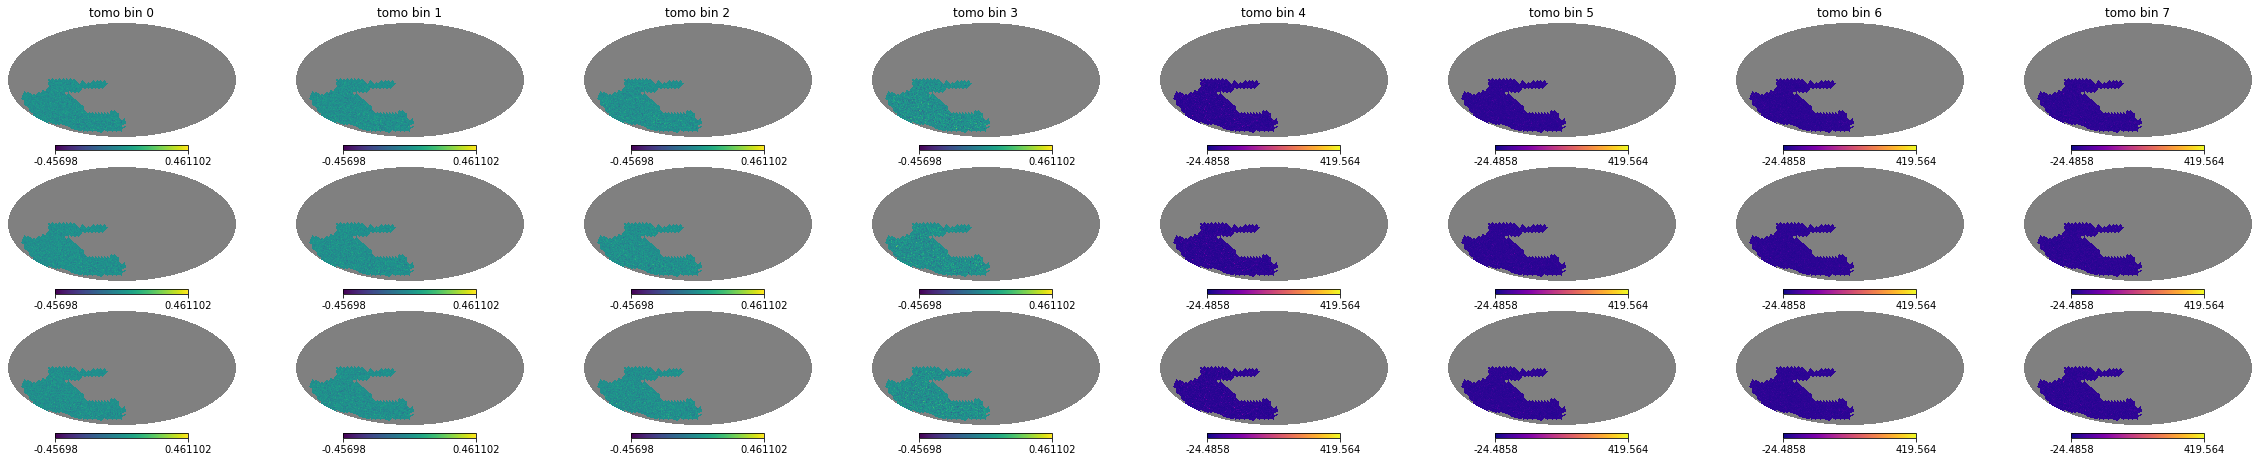

In [12]:
wl_min = np.array(dvs_noisy[...,:n_z_metacal]).min()
wl_max = np.array(dvs_noisy[...,:n_z_metacal]).max()

gc_min = np.array(dvs_noisy[...,n_z_metacal:]).min()
gc_max = np.array(dvs_noisy[...,n_z_metacal:]).max()

plt.figure(figsize=(4*n_z,2*n_noise))

i_subplot = 1
for i_n  in range(n_noise):
    for i_z in range(n_z):
        # lensing
        if i_z < n_z_metacal:
            vmin = wl_min
            vmax = wl_max
            cmap = "viridis"

        # clustering
        else:
            vmin = gc_min
            vmax = gc_max
            cmap = "plasma"
            
        if i_n == 0:
            title = f"tomo bin {i_z}"
        else:
            title = ""

        hp_map = np.full(n_pix, hp.UNSEEN)
        hp_map[data_vec_pix] = dvs_noisy[i_n,:,i_z]
        
        hp.mollview(hp_map, nest=True, cmap=cmap, sub=(n_noise,n_z,i_subplot), xsize=2000, title=title, min=vmin, max=vmax)
        i_subplot += 1

plt.savefig("plots/moll_maps" + filename_suffix + ".png", bbox_inches="tight", dpi=500)